<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Выгрузка-и-изучение-данных" data-toc-modified-id="Выгрузка-и-изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Выгрузка и изучение данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-воронки-событий" data-toc-modified-id="Исследование-воронки-событий-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование воронки событий</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-результатов-эксперимента" data-toc-modified-id="Анализ-результатов-эксперимента-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Анализ результатов эксперимента</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Описание проекта

В проекте будем рассматривать стартап, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи нашего мобильного приложения.

Изучим воронку продаж. Узнаем, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуем результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясним, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также поможет понять, сколько времени и данных потребуется для дальнейших тестов.

**Описание данных**

Каждая запись в логе — это действие пользователя, или событие.

- EventName  — название события
- DeviceIDHash  — уникальный идентификатор пользователя
- EventTimestamp  — время события
- ExpId  — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная

## Выгрузка и изучение данных

Импортируем основные библиотеки

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import warnings
warnings.simplefilter('ignore')

# Импорт основных библиотек

In [2]:
logs = pd.read_csv('logs_exp.csv', sep = '\t') # Чтени и запись файла
logs.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Выведим общую информацию о датасете

In [3]:
logs.info() # Общая информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


### Вывод

Обозначили переменную с исследуемым датасетом - `logs`. Датасет содержит 4 столбца и  244126 строк. Для более детального погружения в анализ необходимо провести предобработку данных.

Необходимо отметить, что данные о времени события представлены в формате `unix`

## Предобработка данных

Выведим датасет на экран

In [4]:
logs.head() # Выводим первые 5 строк датасета

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Приведём название столбцов к привычному виду

In [5]:
logs.columns = logs.columns.str.lower()
logs = logs.rename(columns = {'eventname' : 'event_name', 
                        'deviceidhash' : 'device_id_hash',
                        'eventtimestamp' : 'event_timestamp',
                        'expid' : 'exp_id'})

# Замена наименования столбцов

Проверим датасет на наличие дубликатов

In [6]:
logs.duplicated().sum() # Поиск дубликатов

413

Удалим дублирующиеся строки датасета

In [7]:
logs = logs.drop_duplicates() # Удаление дубликатов
logs.duplicated().sum()

0

Проверим данные на наличие пропусков

In [8]:
logs.isnull().sum() # Проверка на наличие пропусков

event_name         0
device_id_hash     0
event_timestamp    0
exp_id             0
dtype: int64

Добавим дополнительный столбец даты и времени `datetime` , а так же отдельный столбец дат `date`

In [9]:
logs['datetime'] = pd.to_datetime(logs['event_timestamp'], unit = 's') # Создание дополнительных столбцов
logs['date'] = logs['datetime'].dt.date
logs.head()

,event_name,device_id_hash,event_timestamp,exp_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


### Вывод

В ходе предобработки данных проделали следующие действия:

- Изменилил названия столбцов датасета
- Избавились от дубликатов
- Проверили датасет на наличие пропусков
- Убедились в корректности типов данных каждого столбца
- Добавили столбцы `datetime` и `date`

## Исследовательский анализ данных

Найдём все уникальные события в логах

In [10]:
logs['event_name'].unique() # Уникальные значения столбца

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

Всего имеем 5 событий:

- MainScreenAppear - главный экран приложения
- OffersScreenAppear - конкретный товар в приложении
- CartScreenAppear - добавление товара в корзину
- PaymentScreenSuccessful - оплата товара
- Tutorial - руководство к пользованию приложением

Посчитаем количество уникальных пользователей в логе

In [11]:
logs['device_id_hash'].nunique() # Количество уникальных значений в столбце

7551

Имеем 7551 уникальных пользователей, которые использовали приложение в указанный период. Определим сколько в среднем уникальных событий приходится на пользователя. Будем рассматривать лишь уникальные логи, так как большая часть покупателей совершали покупки несколько раз

In [12]:
logs.groupby('device_id_hash').agg({'event_name' : 'nunique'}).sort_values('event_name', ascending=False) \
.rename(columns ={'event_name' : 'count_of_events'}).describe()

# Общая информация по сгруппированным данным

,count_of_events
count,7551.000000
mean,2.674480
std,1.454287
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,5.000000


Среднее значение количества событий равняется 2.67. Медианное значение - 3.

Определим максимальную и минимальную дату периода, за который представлены данные

In [13]:
print('Максимальная дата:' , max(logs['datetime'])) # Максимальная и минимальная дата логов
print('Минимальная дата:', min(logs['datetime']))

Максимальная дата: 2019-08-07 21:15:17
Минимальная дата: 2019-07-25 04:43:36


Итак, располагаем данными с 25 июля 2019 года по 7 августа 2019 года.

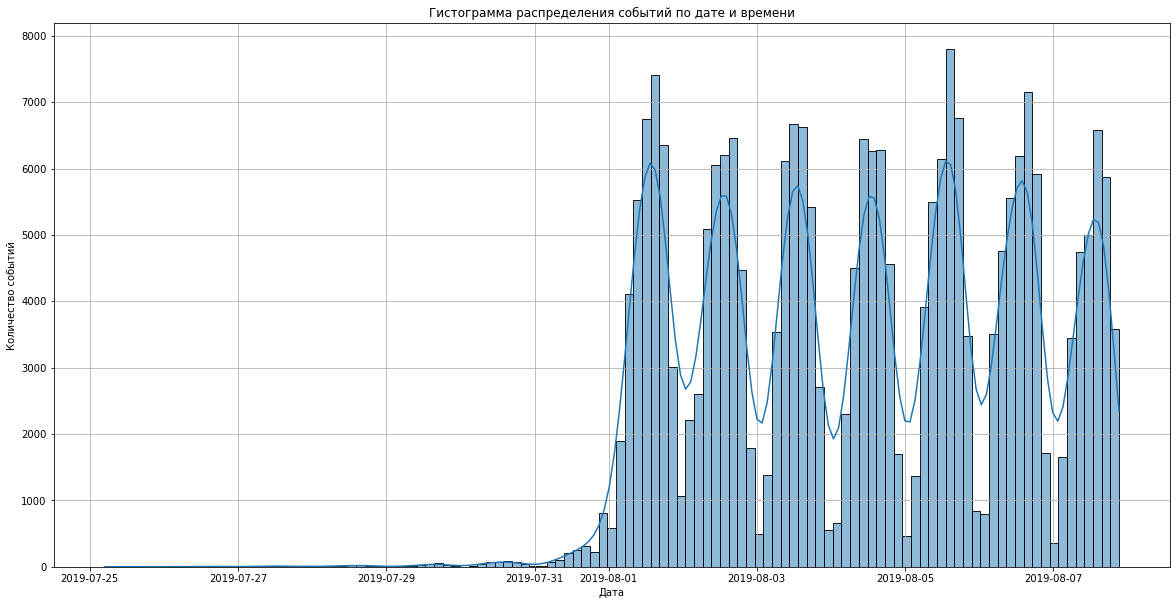

In [14]:
fig, test = plt.subplots()
test.set_title('Гистограмма распределения событий по дате и времени')
test.set_ylabel('Количество событий')
test.set_xlabel('Дата')

fig.set_figheight(10)
fig.set_figwidth(20)

sns.histplot(data=logs, x='datetime', kde=True)
plt.grid();

# Построение гистограммы

По гистограмме заметно, данные распределены весьма странным образом. Можем предположить, что форма распределения связана с тем, что до 1 августа 2019 года данные были неполные. Построим такую же диаграмму во временном диапазоне от 1 августа.

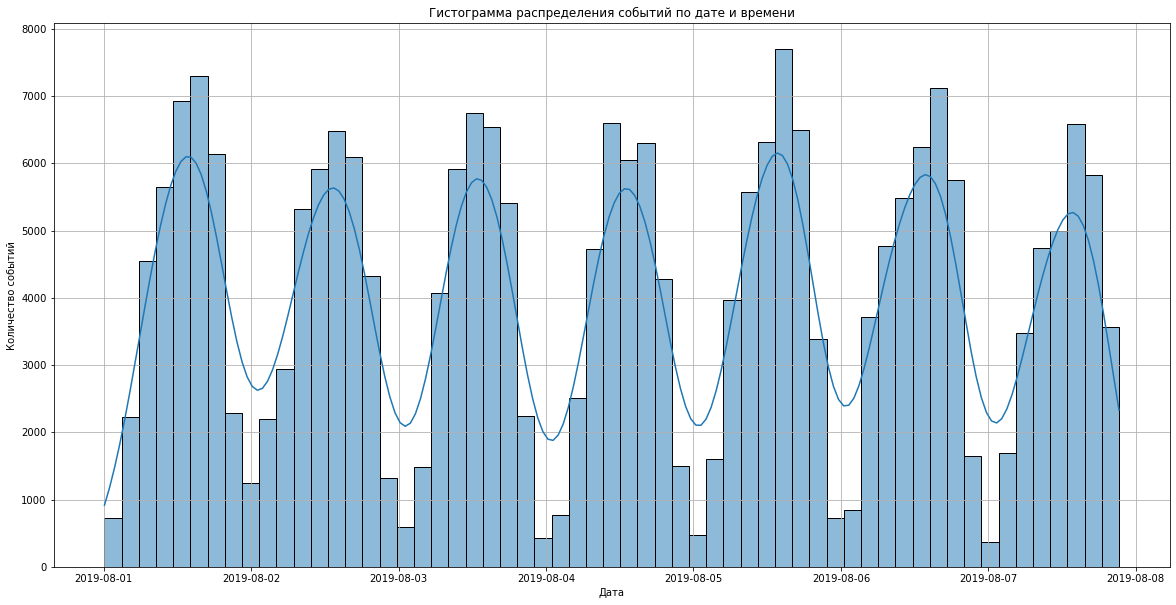

In [15]:
fig, test = plt.subplots()
test.set_title('Гистограмма распределения событий по дате и времени')
test.set_ylabel('Количество событий')
test.set_xlabel('Дата')

fig.set_figheight(10)
fig.set_figwidth(20)

sns.histplot(data=logs[logs['datetime'] >= '2019-08-01'], x='datetime', kde=True)
plt.grid();

# Построение гистограммы

Проверим количество строк, которые характеризуют временной период до 1 августа

In [16]:
logs[logs['datetime'] < '2019-08-01'] # Срез данных

,event_name,device_id_hash,event_timestamp,exp_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
2823,OffersScreenAppear,2413191300976302222,1564617295,247,2019-07-31 23:54:55,2019-07-31
2824,MainScreenAppear,5505110279185484837,1564617450,247,2019-07-31 23:57:30,2019-07-31
2825,MainScreenAppear,5505110279185484837,1564617462,247,2019-07-31 23:57:42,2019-07-31
2826,MainScreenAppear,5505110279185484837,1564617472,247,2019-07-31 23:57:52,2019-07-31


С учётом, что всего строк датасета 243713, получаем, что доля "неполных" данных составляет чуть более 1%. Перезапишем наш датасет с учётом выявленной зависимости

In [17]:
logs = logs[logs['datetime'] >= '2019-08-01'] # Срез данных

Удостоверимся, что во всех экспериментальных группах есть пользователи.

In [18]:
logs['exp_id'].value_counts() # Подсчёт количества пользователей в каждой группе

248    84563
246    79302
247    77022
Name: exp_id, dtype: int64

### Вывод

В ходе исследователького анализа установили:

- Количество событий в логах - 5
- Количество уникальных пользователей - 7551 человек
- В среднем на одного поситителя приходится 2.67 события
- Данные представлены за период с 25 июля 2019 года по 7 августа 2019 года
- Часть данных, а именно до 1 августа, являются неполными
- Произвели срез данных по дате указанной выше. В дальнейшем для анализа будут использоваться только полные данные - начиная с 1 августа 2019 года
- В каждую из экспериментальных групп попали пользователи.

## Исследование воронки событий

Определим как часто встречается каждое событие в логах

In [19]:
logs['event_name'].value_counts().sort_values(ascending=False) # Подсчёт количества значений для каждого события

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

Посчитаем количество уникальных пользователей по каждому событию. Добавим столбец `involved_users`, в котором будет отражена доля пользователей, которая совершала конкретное событие

In [20]:
count_of_users = logs.groupby('event_name').agg({'device_id_hash' : 'nunique'}) \
.rename(columns = ({'device_id_hash' : 'count_of_users'})) \
.sort_values('count_of_users', ascending=False)

count_of_users['involved_users'] = round(count_of_users['count_of_users']/logs['device_id_hash'].nunique(),2)

count_of_users

# Подсчёт количества уникальных пользователей по каждому событию

,count_of_users,involved_users
event_name,,
MainScreenAppear,7419,0.98
OffersScreenAppear,4593,0.61
CartScreenAppear,3734,0.50
PaymentScreenSuccessful,3539,0.47
Tutorial,840,0.11


Событие `Tutorial`, в котором заложено взаимодействие пользователя с руководством использования приложения, имеет самую низкую конверсию.
Можем предпололжить, что этот этап можно не рассматривать при расчёте общей продуктовой воронки. Таким образом, таблица продуктовой воронки будет выглядить следующим образом

In [21]:
count_of_users = count_of_users.head(4).reset_index() # Датасет для расчёта продуктовой воронки
count_of_users

,event_name,count_of_users,involved_users
0,MainScreenAppear,7419,0.98
1,OffersScreenAppear,4593,0.61
2,CartScreenAppear,3734,0.50
3,PaymentScreenSuccessful,3539,0.47


Построим продуктовую воронку продаж

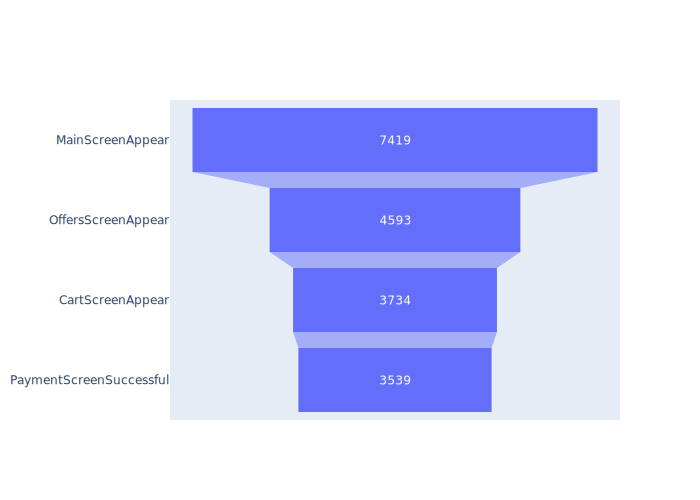

In [22]:
fig = go.Figure(go.Funnel(y = count_of_users['event_name'], x = count_of_users['count_of_users'])) 
fig.show("svg");

# Построение продуктовой воронки

### Вывод

При изучении воронки продаж выявили:

- Событие `Tutorial` можно не рассматривать при подсчёте воронки
- На шаге `OffersScreenAppear` теряется больше всего пользователей - 38.1% от предыдщуего шага
- 47.7% пользователей доходит от события `MainScreenAppear` до оплаты продукта

## Анализ результатов эксперимента

Проверим количество уникальных пользователей в каждой экспериментальной группе. Так же объединим две контрольные группы в одну - 493.

In [23]:
total_users_in_exp = logs.groupby('exp_id', as_index=False) \
.agg({'device_id_hash' : 'nunique'}).rename(columns = ({'device_id_hash' : 'count_of_users'})) \
.sort_values('count_of_users', ascending=False)

new_row = {'exp_id' : 493, \
           'count_of_users' : total_users_in_exp.loc[(total_users_in_exp['exp_id'] == 246)
                                                     | (total_users_in_exp['exp_id'] == 247)]['count_of_users'].sum()}
                                               
total_users_in_exp = total_users_in_exp.append(new_row, ignore_index=True)
total_users_in_exp

# Количество уникальных пользователей в каждой группе

,exp_id,count_of_users
0,248,2537
1,247,2513
2,246,2484
3,493,4997


Можно сказать, что пользователи распределены по группам равномерно

Чтобы проверить корректность всех механизмов и расчётов, сравним две контрольные группы - проведём А/А тест. Контрольные группы - 246 и 247. Для этого для каждой из группы было посчитано число уникальных пользователей, так же посчитаем число пользователей совершивших каждое из действий продуктовой воронки. Событие `Tutorial` в данном случае оставим при расчёте статистической значимости, есть вероятность увидеть интересные инсайты при дальнейшем сравнении тестовой и контрольной групп.

В итоговый датасет `exp_groups` так же добавим объединененую контрольную группу с *exp_id* равным 493

In [24]:
exp_groups = logs.groupby(['exp_id', 'event_name'], as_index=False) \
.agg({'device_id_hash' : 'nunique'}).rename(columns = ({'device_id_hash' : 'count_of_users'})) \
.sort_values(['exp_id', 'count_of_users'], ascending=False)

table_for_merge = exp_groups[exp_groups['exp_id'] != 248].groupby('event_name', as_index=False) \
.agg({'exp_id' : 'first', 'count_of_users' : 'sum'}).sort_values('count_of_users', ascending=False)

table_for_merge['exp_id'] = 493
table_for_merge = table_for_merge[['exp_id', 'event_name', 'count_of_users']]

exp_groups = exp_groups.merge(table_for_merge, how = 'outer')
exp_groups

# Продуктовая воронка для каждой группы

,exp_id,event_name,count_of_users
0,248,MainScreenAppear,2493
1,248,OffersScreenAppear,1531
2,248,CartScreenAppear,1230
3,248,PaymentScreenSuccessful,1181
4,248,Tutorial,279
5,247,MainScreenAppear,2476
6,247,OffersScreenAppear,1520
7,247,CartScreenAppear,1238
8,247,PaymentScreenSuccessful,1158
9,247,Tutorial,283


Создадим функцию с помощью которой будем проверять статистическую значимость различий между нашими выборками. Так как при анализе результатов эксперимента будет иметь место множественное сравнение необходимо скорректировать *aLpha* уровень значимости согласно поправке Бонферрони.

Если принять уровень значимости в 0.05, то скорректированная групповая вероятность ошибки первого рода будет равна 0.05/m, где m - число сравнений

Озвучим гипотезы для проверки статистической значимости между контрольными и тестовой группами:
- H0: Разницы между двумя версиями приложениям нету
- H1: Между двумя версиями приложениями есть разница

In [25]:
def stat_test(name_of_event, exp_number_1, exp_number_2):
    
    m = 16 # Число сравнений
    alpha = 0.05/m # Критический уровень значимости

    successes = np.array([exp_groups.loc[(exp_groups['event_name'] == name_of_event) &
                                     (exp_groups['exp_id'] ==  exp_number_1)]['count_of_users'],
                      exp_groups.loc[(exp_groups['event_name'] == name_of_event) &
                                     (exp_groups['exp_id'] ==  exp_number_2)]['count_of_users']])
    trials = np.array([total_users_in_exp[total_users_in_exp['exp_id'] == exp_number_1]['count_of_users'],
                   total_users_in_exp[total_users_in_exp['exp_id'] == exp_number_2]['count_of_users']])

# пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
    difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

Вызовим функцию `stat_test` и параметру `name_of_event` будем последовательно присваивать разные варианты событий

In [26]:
stat_test('MainScreenAppear', 247, 246) # Вызов функции

p-значение:  [0.75705972]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [27]:
stat_test('OffersScreenAppear', 247, 246) # Вызов функции

p-значение:  [0.24809546]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [28]:
stat_test('PaymentScreenSuccessful', 247, 246) # Вызов функции

p-значение:  [0.11456679]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [29]:
stat_test('Tutorial', 247, 246) # Вызов функции

p-значение:  [0.93769962]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Ни в одном из событий статистически значимой разницы между **контрольными группами** не достигнуто. Можно предположить, что дизайн эксперимента проходил правильно и разбиение на группы работает корректно.

Аналогочино поступим с группой с измененным шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним группы - 248 и 247.

In [30]:
stat_test('MainScreenAppear', 248, 247) # Вызов функции

p-значение:  [0.45870536]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [31]:
stat_test('OffersScreenAppear', 248, 247) # Вызов функции

p-значение:  [0.91978178]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [32]:
stat_test('PaymentScreenSuccessful', 248, 247) # Вызов функции

p-значение:  [0.73734151]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [33]:
stat_test('Tutorial', 248, 247) # Вызов функции

p-значение:  [0.76532392]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Ни в одном из событий статистически значимой разницы между контрольной (247) и тестовой (248) группами не достигнуто.

Сравним группы 248 и 246

In [34]:
stat_test('MainScreenAppear', 248, 246) # Вызов функции

p-значение:  [0.29497219]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [35]:
stat_test('OffersScreenAppear', 248, 246) # Вызов функции

p-значение:  [0.20836205]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [36]:
stat_test('PaymentScreenSuccessful', 248, 246) # Вызов функции

p-значение:  [0.21225533]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [37]:
stat_test('Tutorial', 248, 246) # Вызов функции

p-значение:  [0.8264294]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Ни в одном из событий статистически значимой разницы между контрольной (246) и тестовой (248) группами не достигнуто.

Сравним группы 493 и 248

In [38]:
stat_test('MainScreenAppear', 248, 493) # Вызов функции

p-значение:  [0.29424527]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [39]:
stat_test('OffersScreenAppear', 248, 493) # Вызов функции

p-значение:  [0.4342555]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [40]:
stat_test('PaymentScreenSuccessful', 248, 493) # Вызов функции

p-значение:  [0.60042943]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [41]:
stat_test('Tutorial', 248, 493) # Вызов функции

p-значение:  [0.76486247]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Статистически значимых различий между объединенной контрольной группой и тестовой не наблюдается ни в одном из событий.

Так как количество уникальных пользователей в каждой группе достаточно велико, ЦПТ о распределении выборочных средних даёт возможность провести дополнительно t-тест и сравнить средние, к примеру, групп 247 и 248.
Гипотезы для проведения t-теста:

- H0: Среднее значение количества событий в тестовой и контрольной группе одинаковое
- H1: Среднее значение количества событий в тестовой и контрольной группе отличается

Для этого посчитаем сколько в среднем событий приходится на пользователя в контрольной группе 247 и тестовой 248.

In [42]:
sample_247 = logs[logs['exp_id'] == 247].groupby('device_id_hash').agg({'event_name' : 'nunique'}) \
.sort_values('event_name', ascending=False) \
.rename(columns ={'event_name' : 'count_of_events'}).squeeze() # Создание выборки

sample_248 = logs[logs['exp_id'] == 248].groupby('device_id_hash').agg({'event_name' : 'nunique'}) \
.sort_values('event_name', ascending=False) \
.rename(columns ={'event_name' : 'count_of_events'}).squeeze() # Создание выборки

alpha = 0.05 # Уровень значимости

results = st.ttest_ind(sample_247, sample_248) # Проведение t-теста

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.8117559659083451
Не получилось отвергнуть нулевую гипотезу


При сравнение средних двух выборок статистически значимых различий не обнаружили, что подкрепляет описанные выше выводы.

### Вывод

При анализе результатов экспиримента были выявлены следующие особенности:

- Можно сказать, что пользователи распределены по группам равномерно
- По результатам А/А теста предположили, что дизайн эксперимента проходил правильно и разбиение на группы работает корректно.
- По результатам множественных А/А/B тестов можно заключить, что никаких статистически значимых различий между группами не наблюдается
- t-тест контрольной группы 247 и тестовой выборки подтверждает отсутствие статистически значимых различий

## Вывод

По результатам выполненного исследования:
- Провели предобработку данных для корректной работы с полученным датасетом
- Изучили воронку продуктовых продаж, выявили этапы воронки, на которых отваливается максимальное количество пользователей
- Провели А/А/B тестирование на двух контрольных и одной тестовой группе. Никаких статистически значимых различий между группами обнаружить не удалось.